<a href="https://colab.research.google.com/github/ar851060/ESUN_AI_2021_winter/blob/main/7_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
import seaborn as sns
# plt.style.use('ggplot')
from sklearn.cluster import MiniBatchKMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
comb = []
comb_top = []
target_col = ["dt", "chid","shop_tag",'txn_amt']
for i in range(1,25):
  df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/date_"+str(i)+".csv")
  temp = df[target_col]
  del df
  comb.append(temp)
  # grouped = temp.sort_values(['chid','txn_amt'],ascending=False).groupby("chid").head(3)
  # comb_top.append(grouped)
df = pd.concat(comb)
# df_group = pd.concat(comb_top)
target = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Data/target.csv")

Create Count Features

In [ ]:
df_group['shop_tag'] = df_group['shop_tag'].mask(df_group['shop_tag']=='other',49)
df_group['shop_tag'] = df_group['shop_tag'].astype(int)
df_group[df_group['shop_tag'].isin(pred)].pivot(index = ["chid","shop_tag"], columns = "dt", values = "txn_amt").fillna(0).astype(bool).expanding(min_periods = 1, axis = 1).sum().to_csv("/content/drive/Shareddrives/統學期末比賽/feature/count_before.csv")

In [ ]:
pred = [2,6,10,12,13,15,18,19,21,22,25,26,36,37,39,48]
df['shop_tag'] = df['shop_tag'].mask(df['shop_tag']=='other',49)
df['shop_tag'] = df['shop_tag'].astype(int)
df['txn_amt'] = np.log(df['txn_amt'])
df[df['shop_tag'].isin(pred)].pivot(index = ["chid","shop_tag"], columns = "dt", values = "txn_amt").fillna(0).expanding(min_periods = 1, axis = 1).sum()

dt                       1         2   ...          23          24
chid     shop_tag                      ...                        
10000000 10        9.324088  9.324088  ...  157.095029  166.459018
         12        8.817223  8.817223  ...   81.165236   81.165236
         15        0.000000  0.000000  ...    8.452011    8.452011
         37        0.000000  0.000000  ...    8.351326    8.351326
         48        0.000000  0.000000  ...    0.000000    9.122174
...                     ...       ...  ...         ...         ...
10499999 19        0.000000  0.000000  ...    8.900117    8.900117
         22        0.000000  0.000000  ...   67.579213   67.579213
         25        0.000000  0.000000  ...   18.332126   18.332126
         37        0.000000  0.000000  ...    8.202297    8.202297
         48        0.000000  0.000000  ...    7.651457    7.651457

[3772333 rows x 24 columns]

In [ ]:
df[df['shop_tag'].isin(pred)].pivot(index = ["chid","shop_tag"], columns = "dt", values = "txn_amt").fillna(0).expanding(min_periods = 1, axis = 1).sum().to_csv("/content/drive/Shareddrives/統學期末比賽/feature/total_before.csv")

ACF \& PACF

2
amount


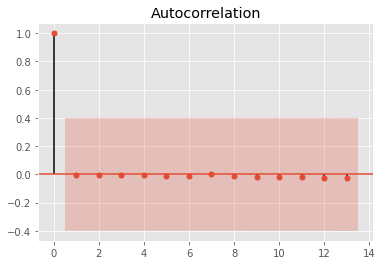

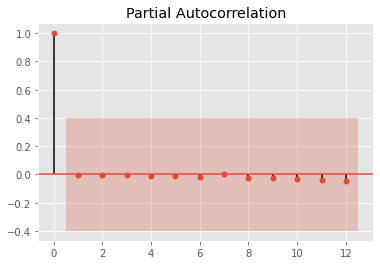

count


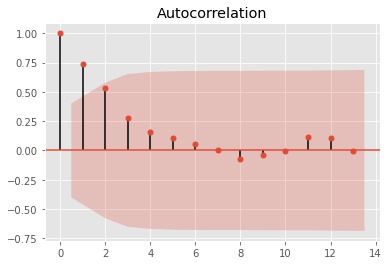

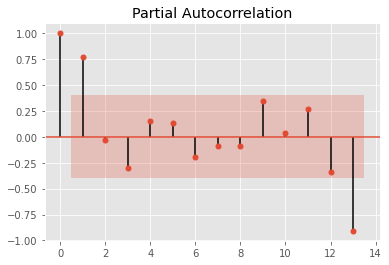

6
amount


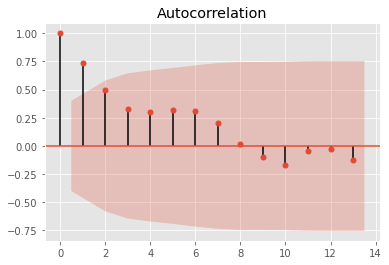

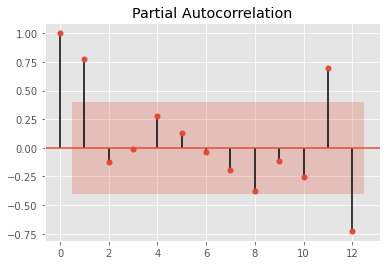

count


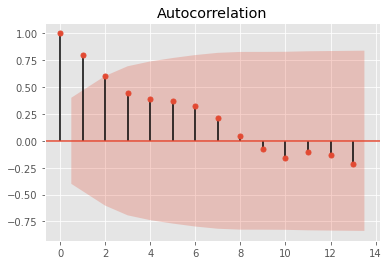

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


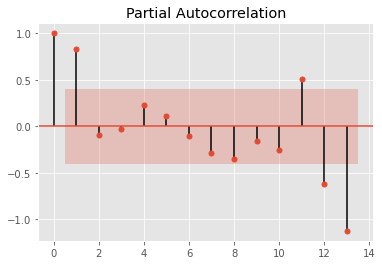

10
amount


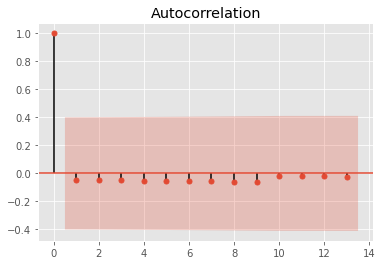

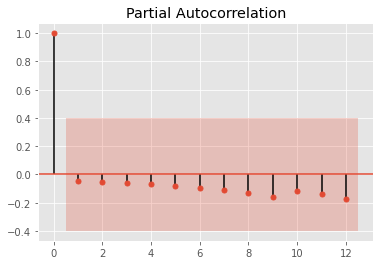

count


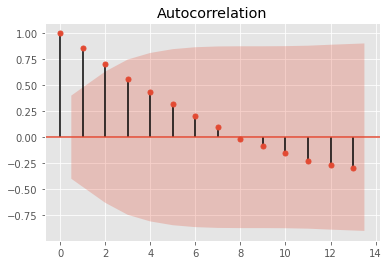

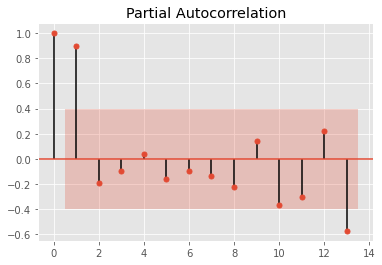

12
amount


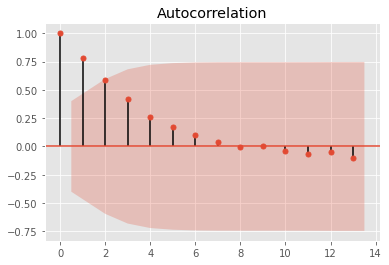

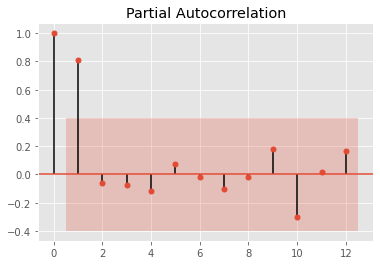

count


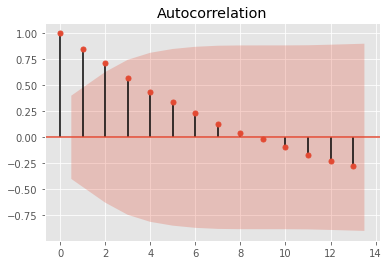

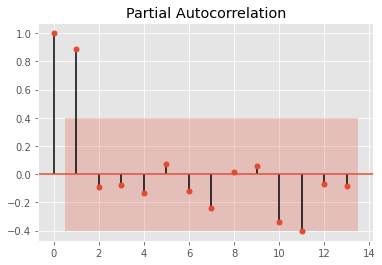

13
amount


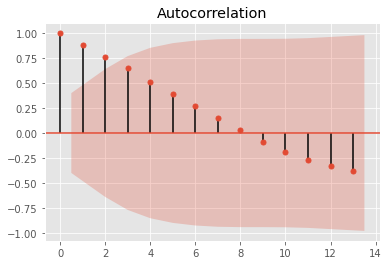

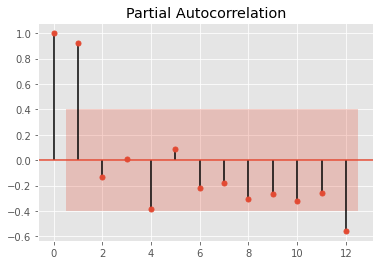

count


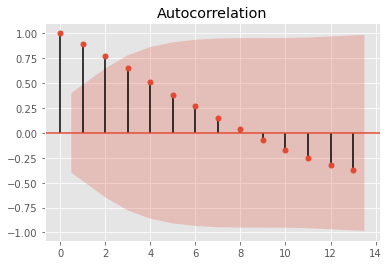

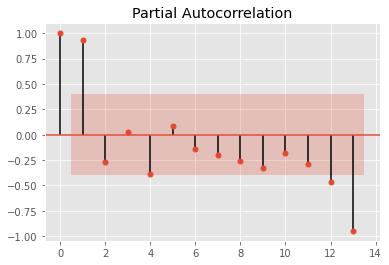

15
amount


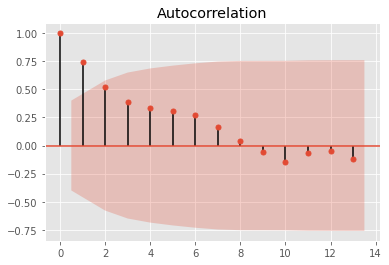

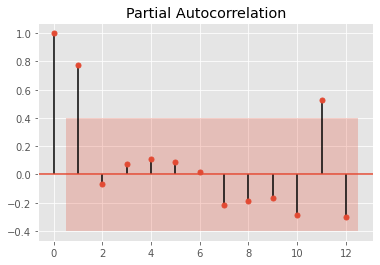

count


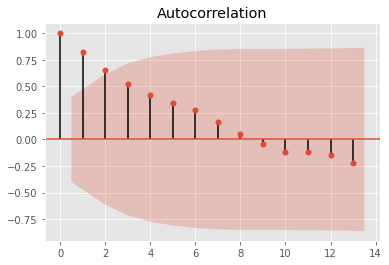

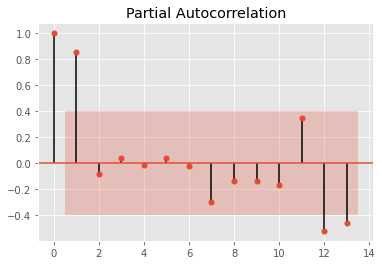

18
amount


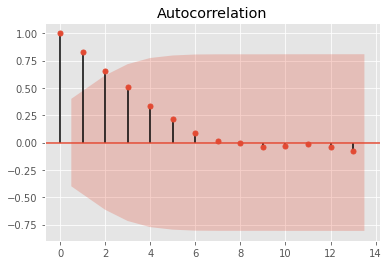

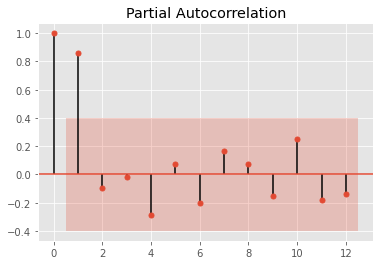

count


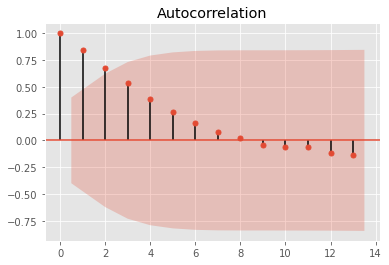

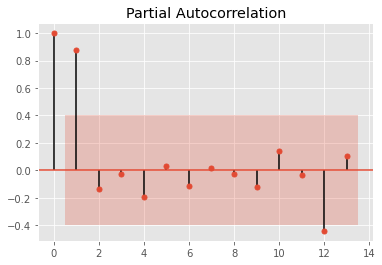

19
amount


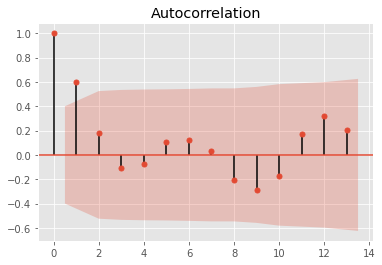

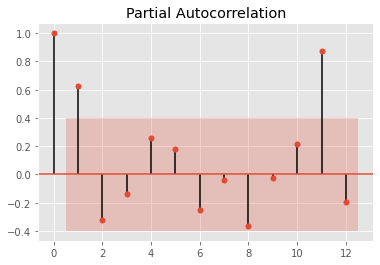

count


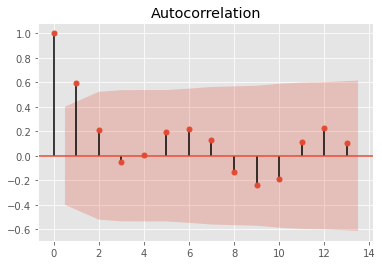

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


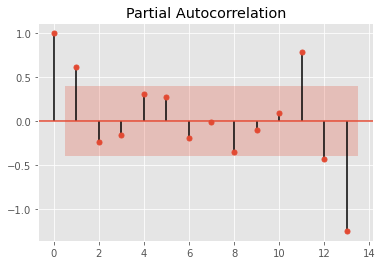

21
amount


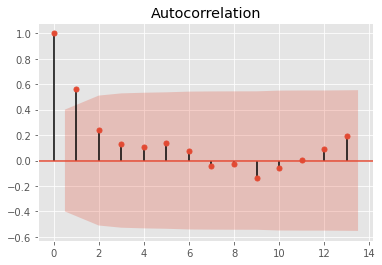

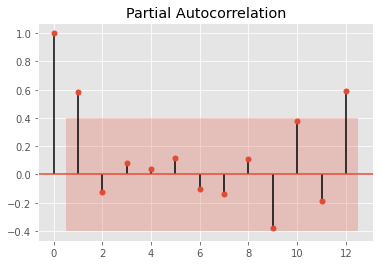

count


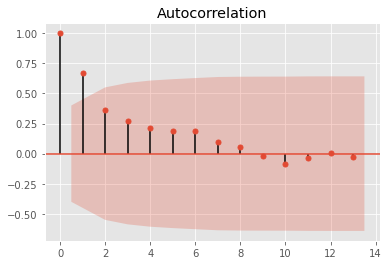

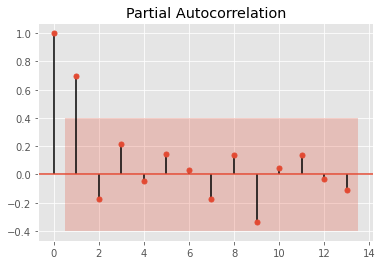

22
amount


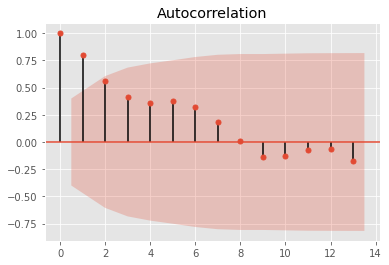

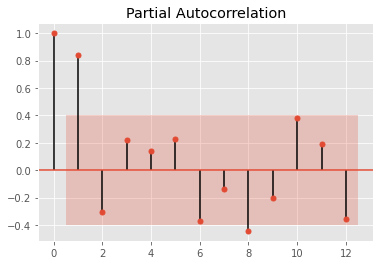

count


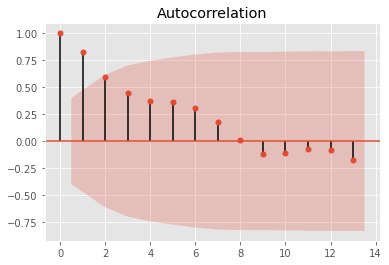

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


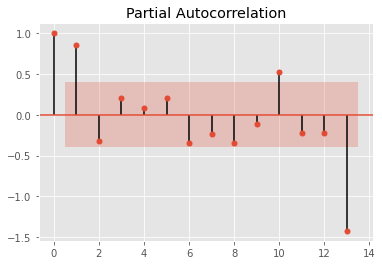

25
amount


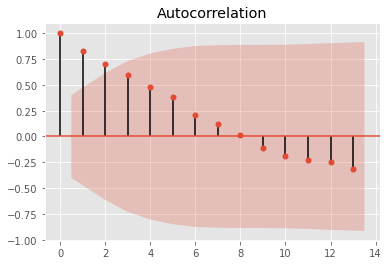

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


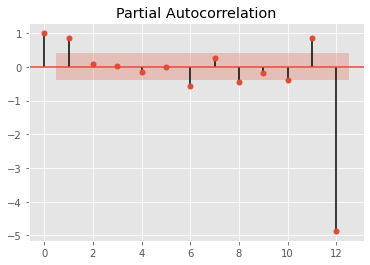

count


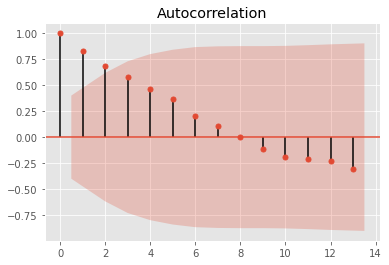

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


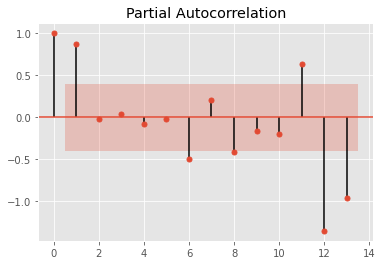

26
amount


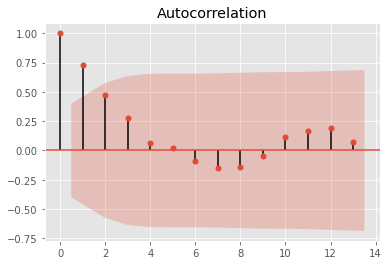

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


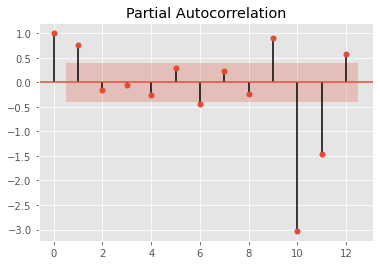

count


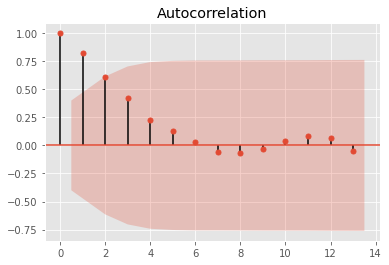

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


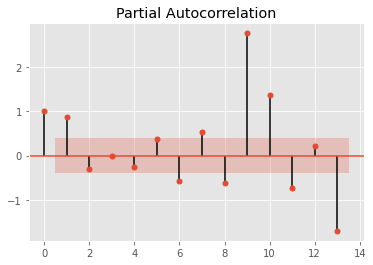

36
amount


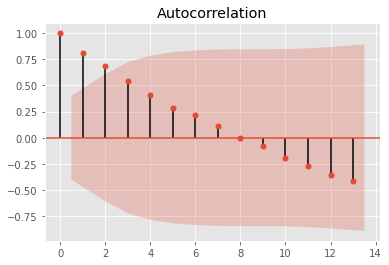

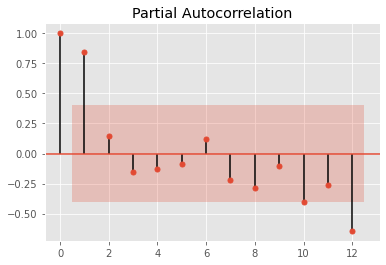

count


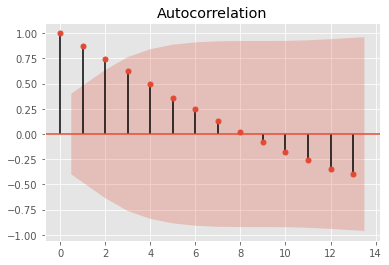

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


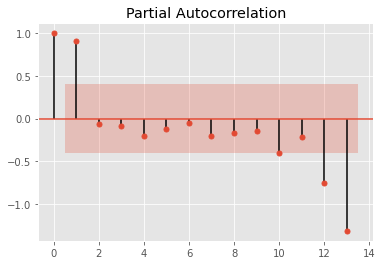

37
amount


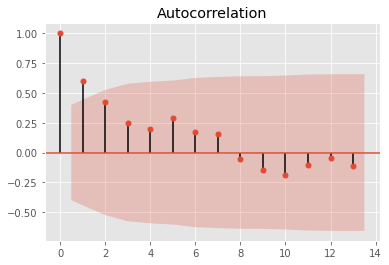

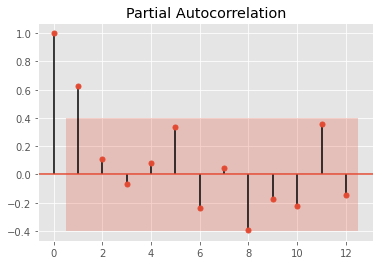

count


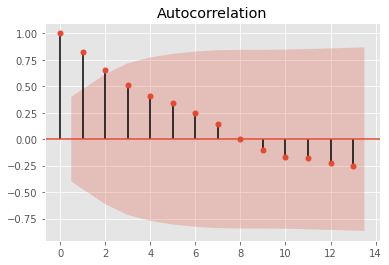

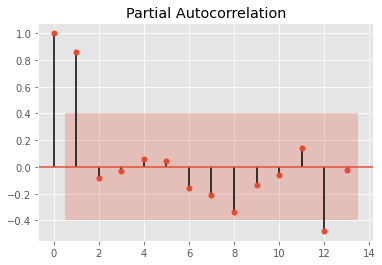

39
amount


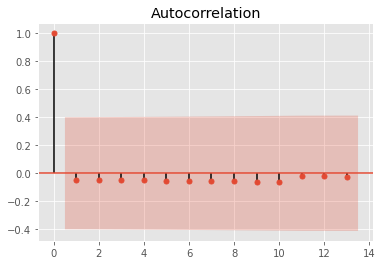

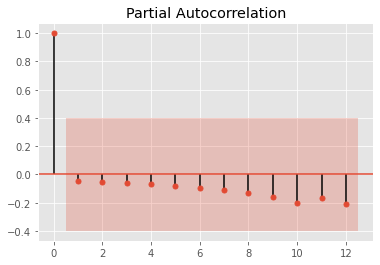

count


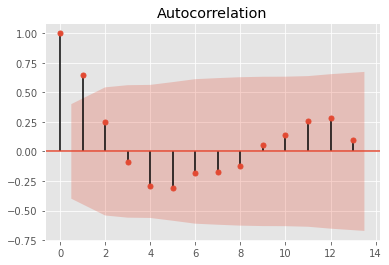

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


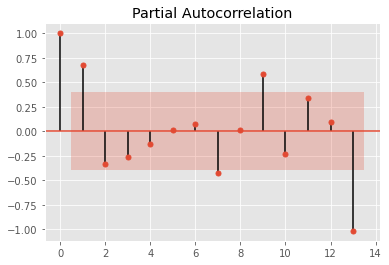

48
amount


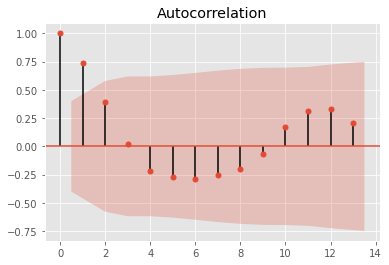

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


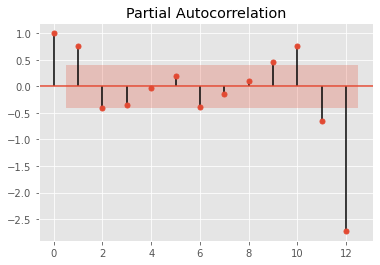

count


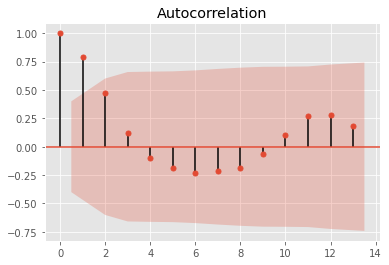

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


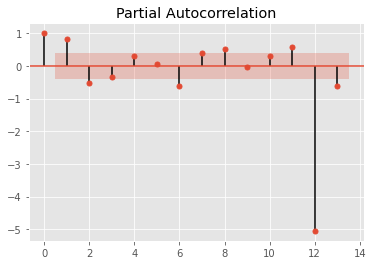

In [ ]:
for i in pred:
  temp = df[df['shop_tag']==i].groupby(['dt'])['txn_amt'].agg(['sum','count'])
  print(i)
  print("amount")
  plot_acf(temp['sum'], lags= 13, alpha=0.05)
  plt.show()
  plot_pacf(temp['sum'], lags= 12, alpha=0.05)
  plt.show()
  print("count")
  plot_acf(temp['count'], lags= 13, alpha=0.05)
  plt.show()
  plot_pacf(temp['count'], lags= 13, alpha=0.05)
  plt.show()

In [ ]:
df_prop = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/feature/prop_lag.csv")

In [ ]:
df_prop['lag'] = df_prop['lag']+1
data['lag'] = 25-data['dt']
data = data.merge(df_prop, how = 'left', left_on = ['lag','shop_tag'], right_on = ['lag','tag']).fillna(0)
data = data.drop(['lag','tag'],axis = 1)

2


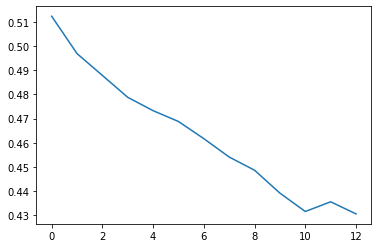

6


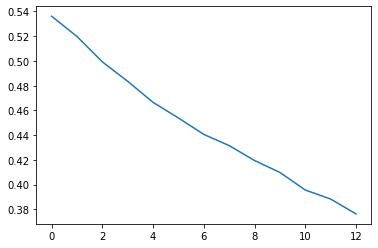

10


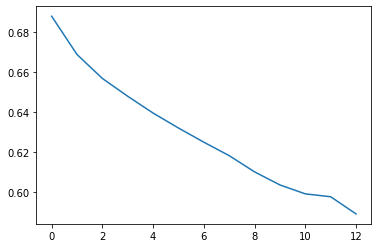

12


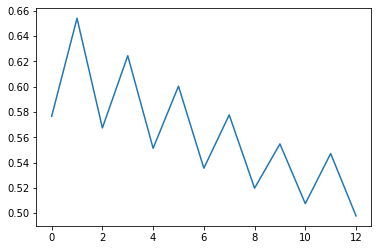

13


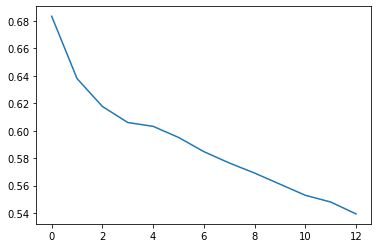

15


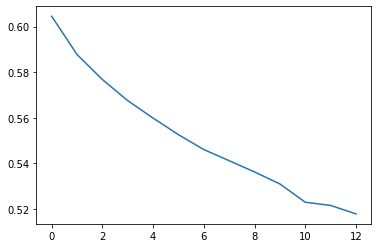

18


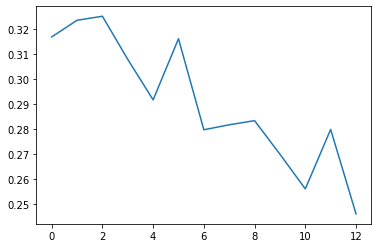

19


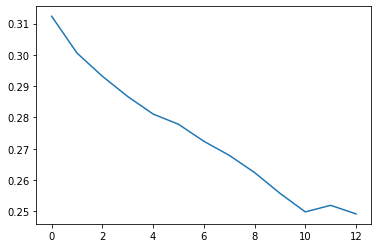

21


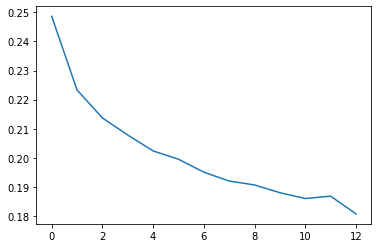

22


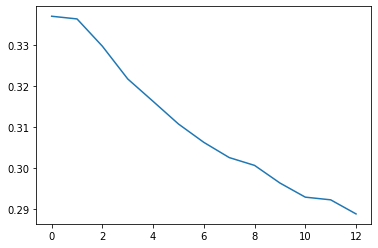

25


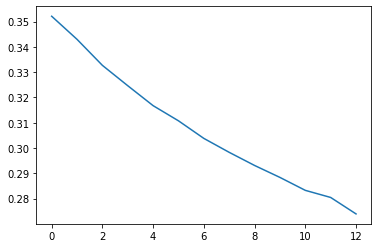

26


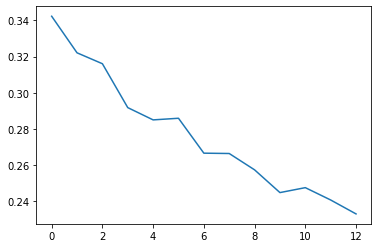

36


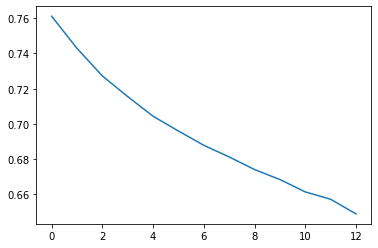

37


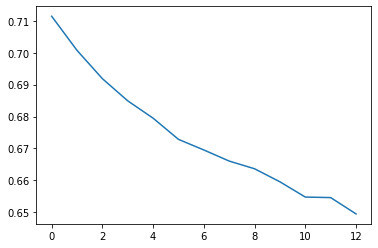

39


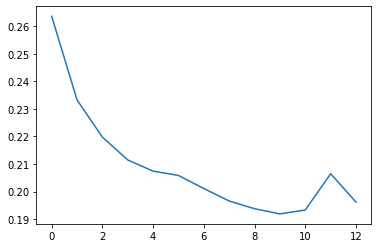

48


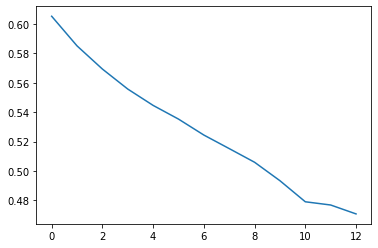

In [ ]:
for i in list(map(str, pred)):
  print(i)
  df_prop[i].plot(legend=False)
  plt.show()

In [ ]:
prop = []
tags = pred
dts = np.sort(df_group['dt'].unique())
for tag in tags:
  temp = df_group[df_group['shop_tag']==tag]
  lag_prop = []
  for lag in range(1,14):
    dt_prop = []
    for dt in dts:
      pop = temp[temp['dt']==dt].shape[0]
      if dt+lag > 24 :
        continue
      ans = pd.merge(temp[temp['dt']==dt],temp[temp['dt']==dt+lag],on='chid').shape[0]
      dt_prop.append(ans/pop)
    lag_prop.append(np.mean(dt_prop))
  prop.append(lag_prop)
df_group_prop = pd.DataFrame(prop, columns=range(1,14), index=pred).T

2
amount


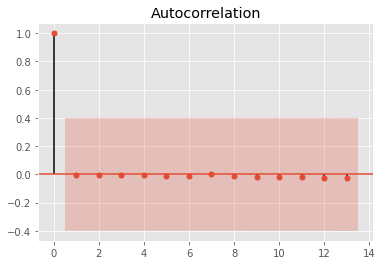

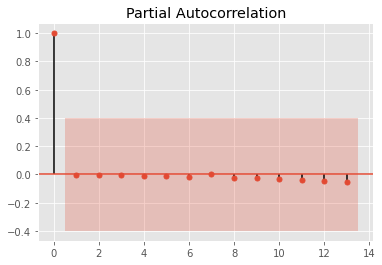

count


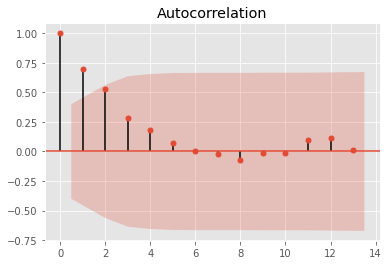

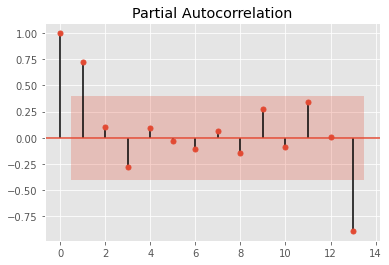

6
amount


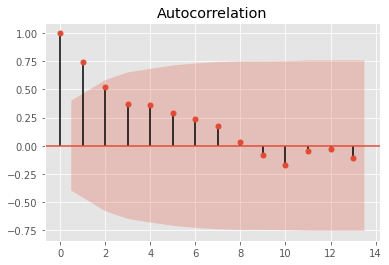

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


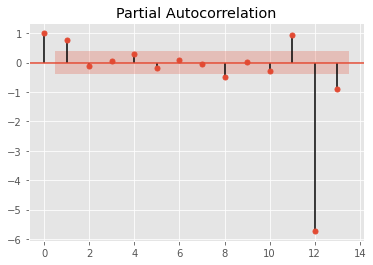

count


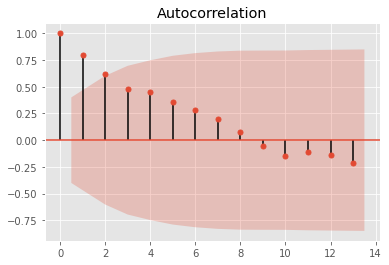

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


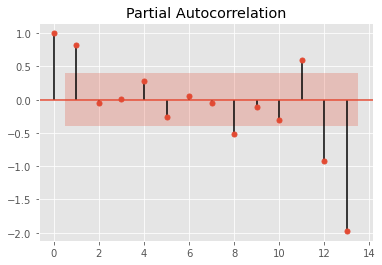

10
amount


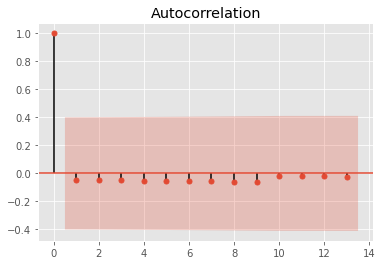

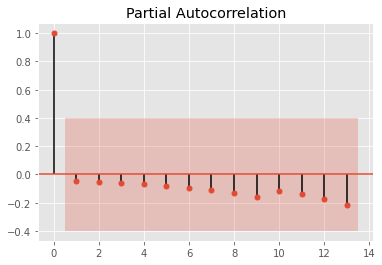

count


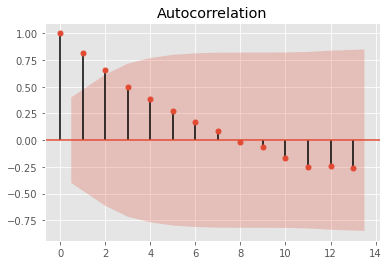

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


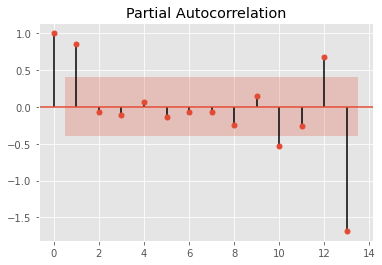

12
amount


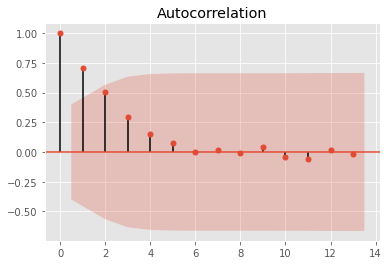

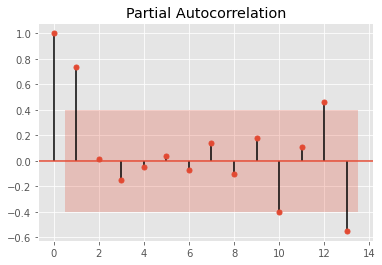

count


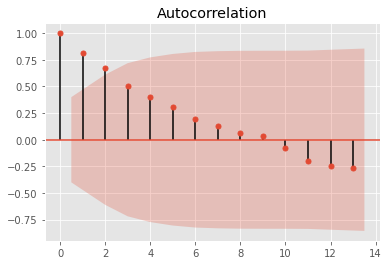

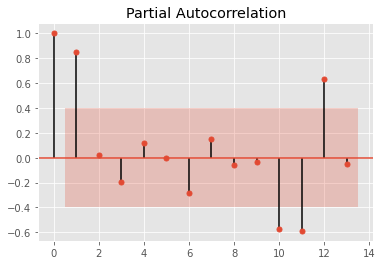

13
amount


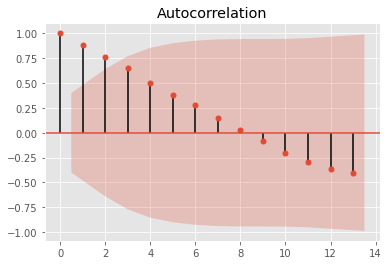

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


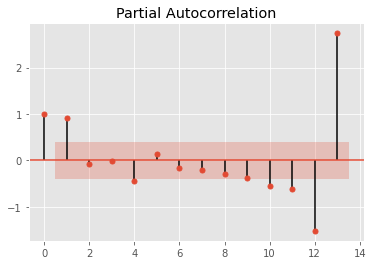

count


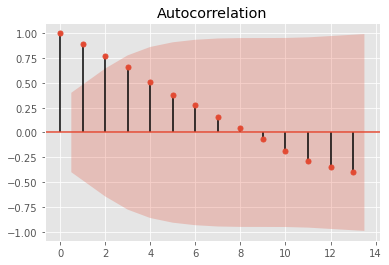

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


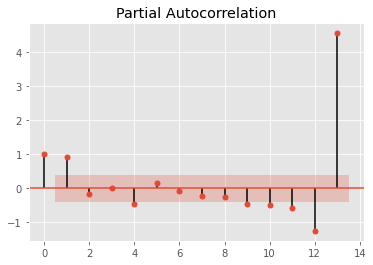

15
amount


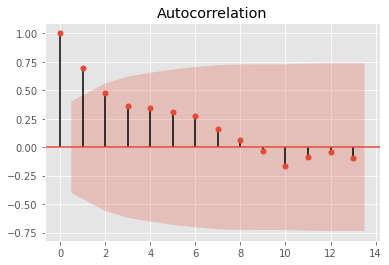

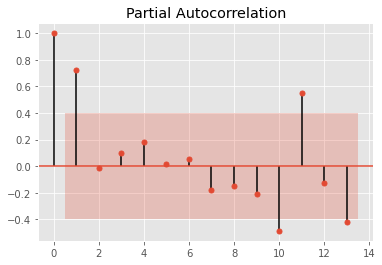

count


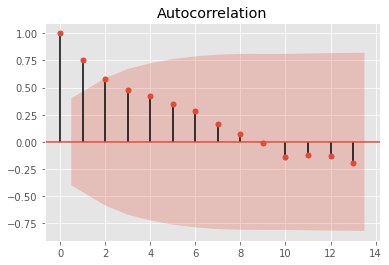

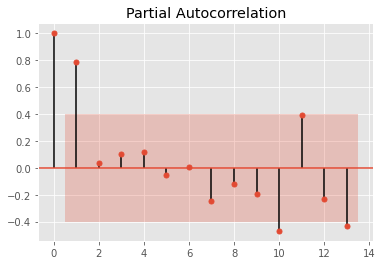

18
amount


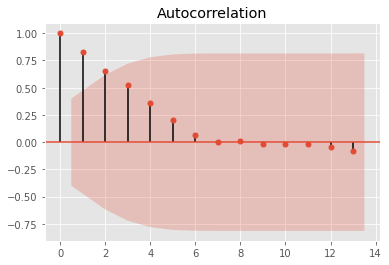

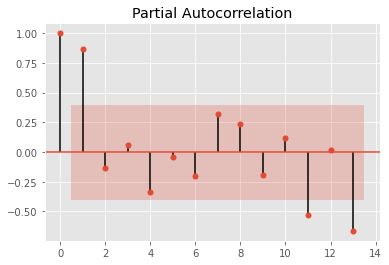

count


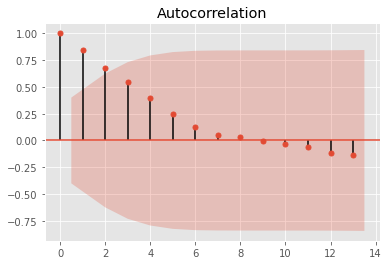

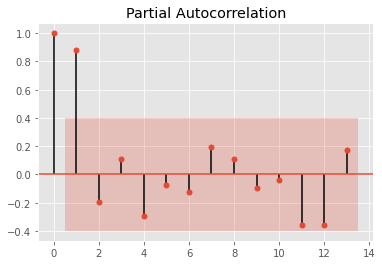

19
amount


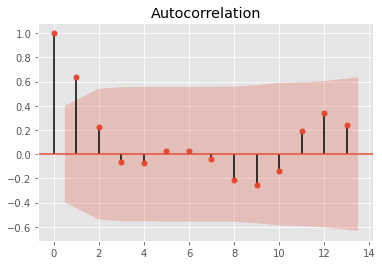

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


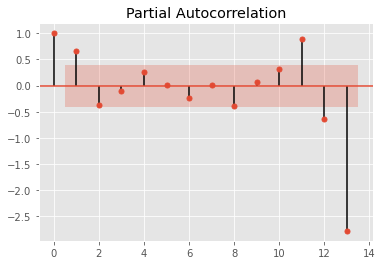

count


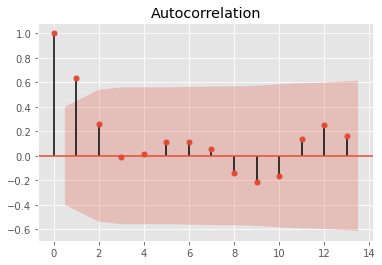

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


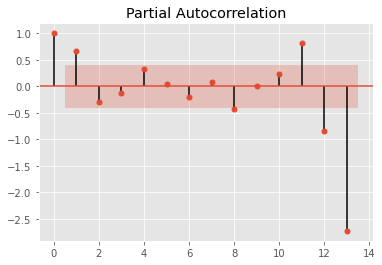

21
amount


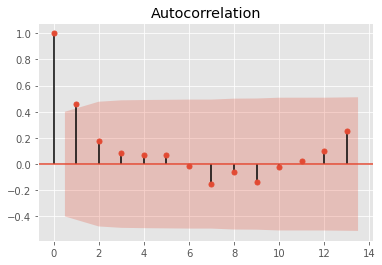

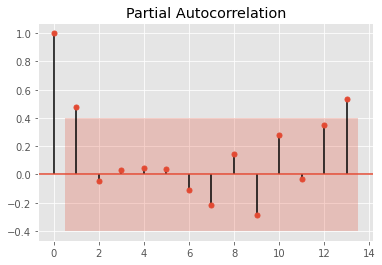

count


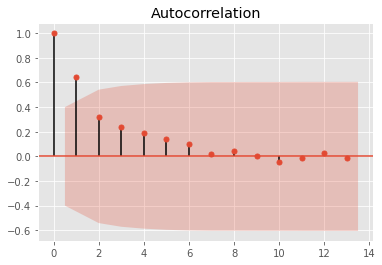

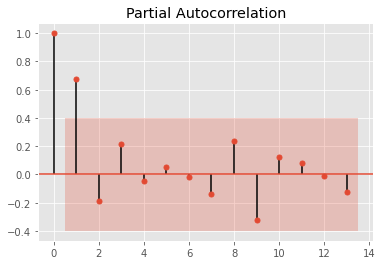

22
amount


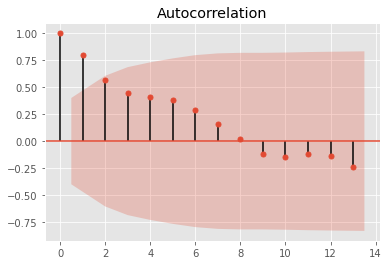

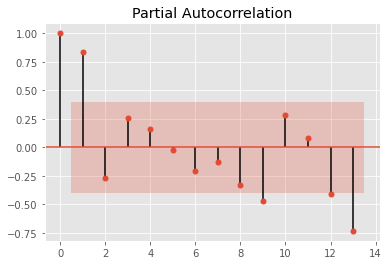

count


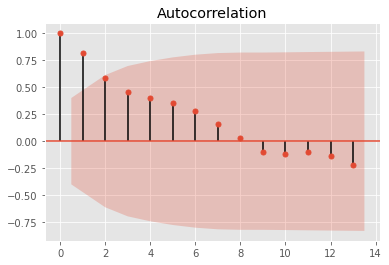

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


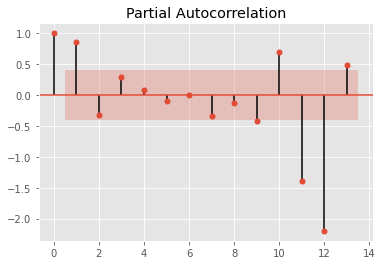

25
amount


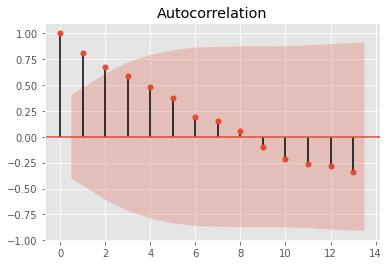

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


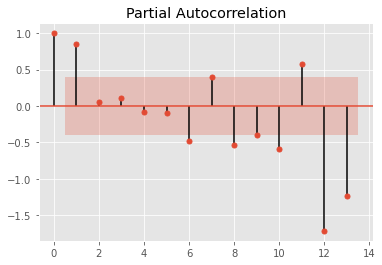

count


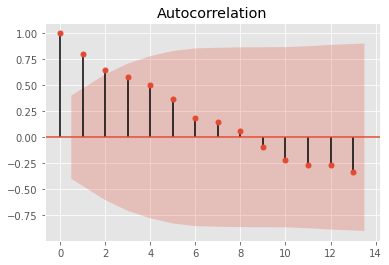

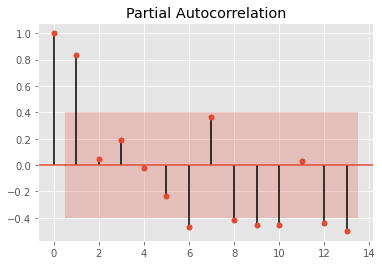

26
amount


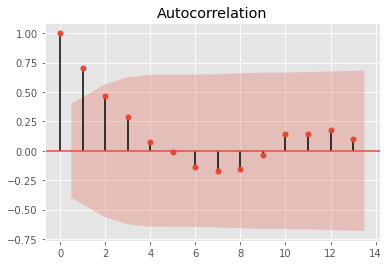

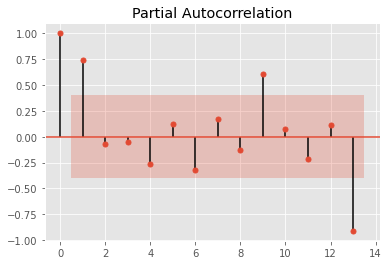

count


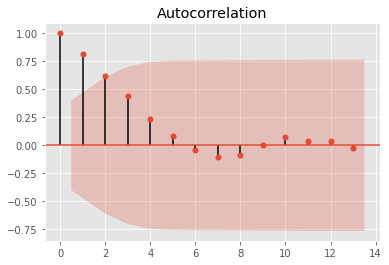

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


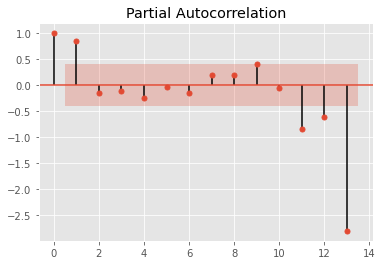

36
amount


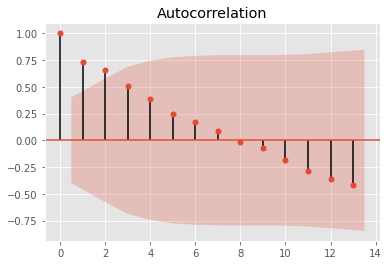

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


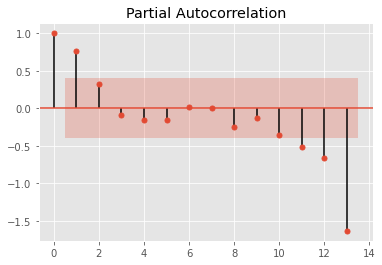

count


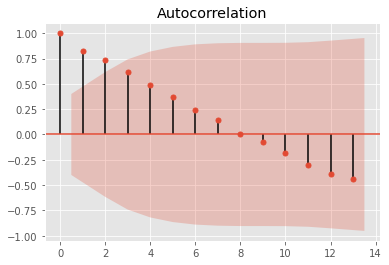

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


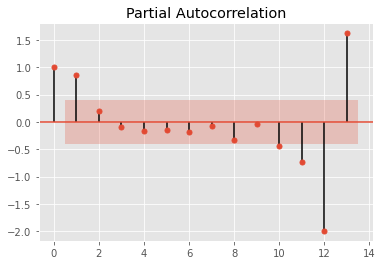

37
amount


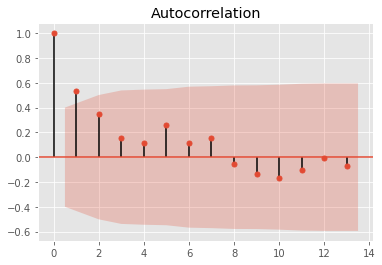

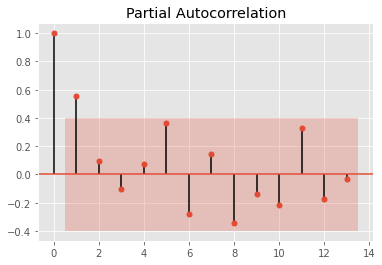

count


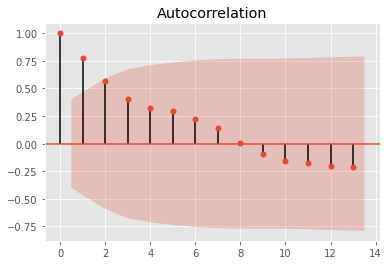

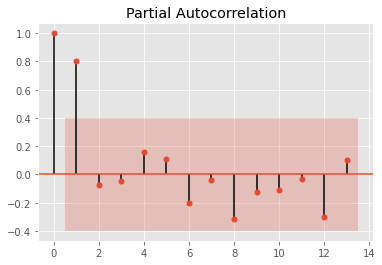

39
amount


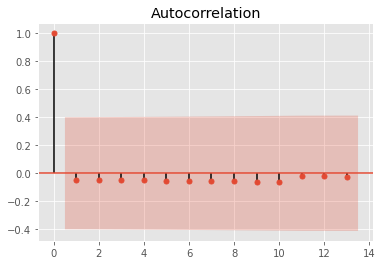

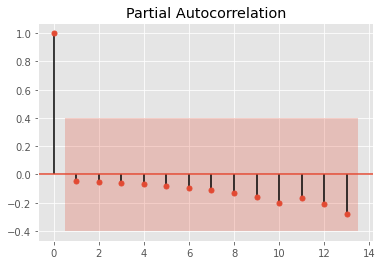

count


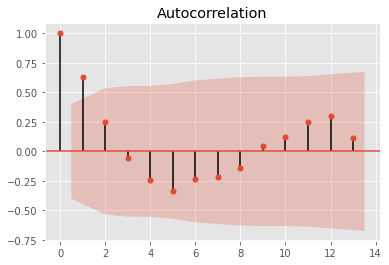

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


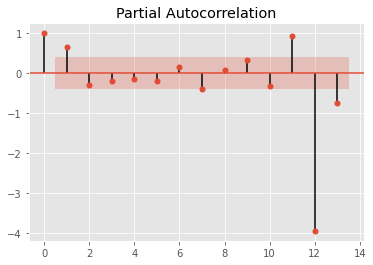

48
amount


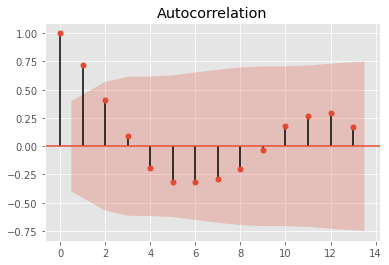

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


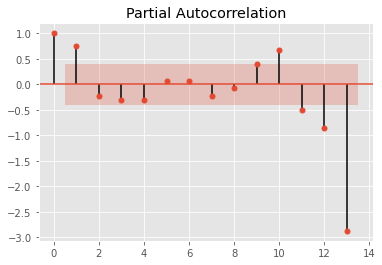

count


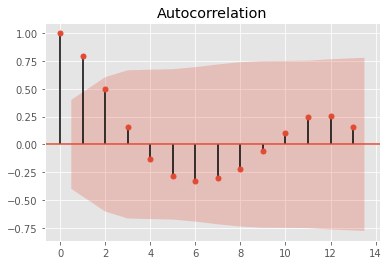

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


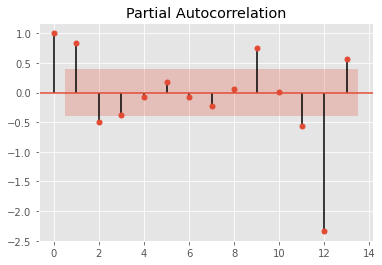

In [ ]:
for i in pred:
  temp = df_group[df_group['shop_tag']==i].groupby(['dt'])['txn_amt'].agg(['sum','count'])
  print(i)
  print("amount")
  plot_acf(temp['sum'], lags= 13, alpha=0.05)
  plt.show()
  plot_pacf(temp['sum'], lags= 13, alpha=0.05)
  plt.show()
  print("count")
  plot_acf(temp['count'], lags= 13, alpha=0.05)
  plt.show()
  plot_pacf(temp['count'], lags= 13, alpha=0.05)
  plt.show()

2


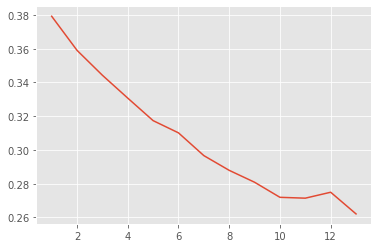

6


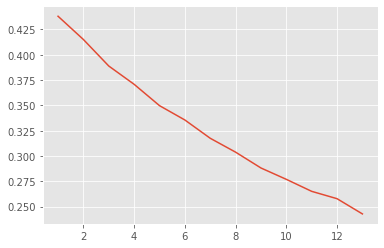

10


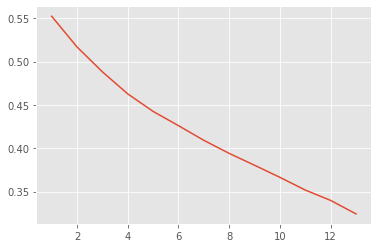

12


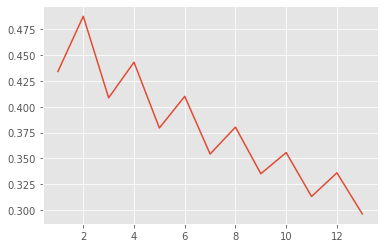

13


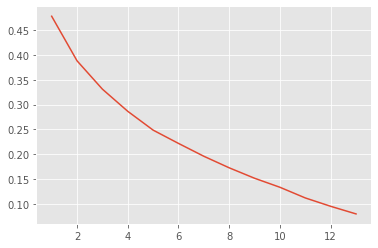

15


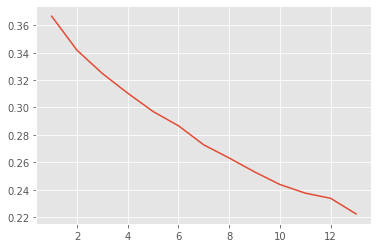

18


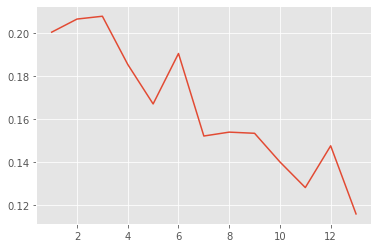

19


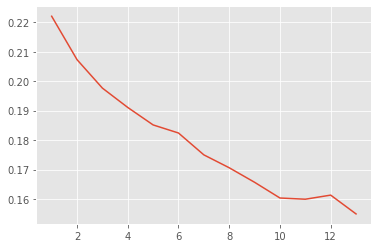

21


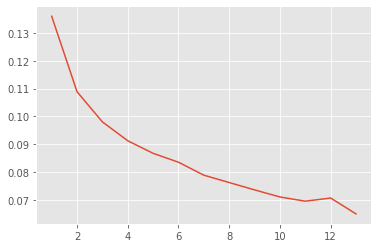

22


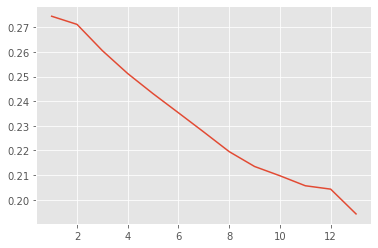

25


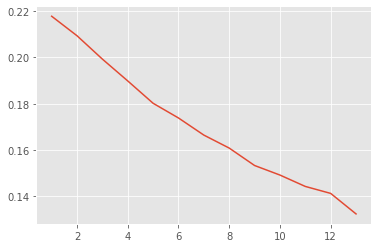

26


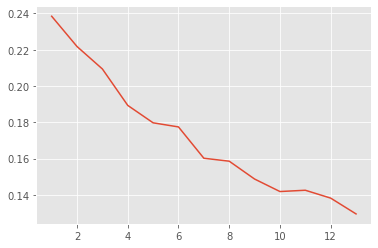

36


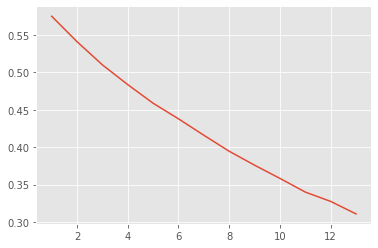

37


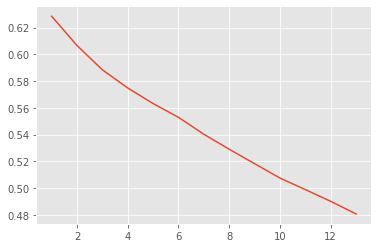

39


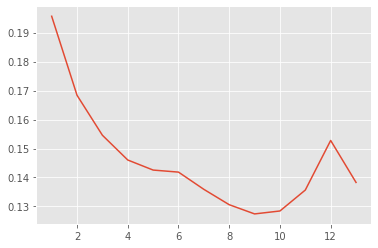

48


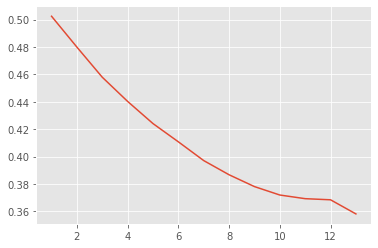

In [ ]:
for i in pred:
  print(i)
  df_group_prop[i].plot(legend=False)
  plt.show()

PCA

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Sample/sample_0.csv")
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
cols = ['card_1_txn_cnt',
       'card_2_txn_cnt', 'card_3_txn_cnt', 'card_4_txn_cnt', 'card_5_txn_cnt',
       'card_6_txn_cnt', 'card_7_txn_cnt', 'card_8_txn_cnt', 'card_9_txn_cnt',
       'card_10_txn_cnt', 'card_11_txn_cnt', 'card_12_txn_cnt',
       'card_13_txn_cnt', 'card_14_txn_cnt', 'card_other_txn_cnt']

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/統學期末比賽/Sample/sample_2.csv")
df = df[cols]

In [ ]:
pca = PCA()
pca.fit(df)
pd.DataFrame(pca.components_).style.apply(lambda x: ["background: yellow" if abs(v) > 0.5 else "" for v in x], axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.283385,-0.025236,-0.003119,-0.033186,-0.003947,0.957955,-0.000895,-0.003561,-0.001249,-0.003880,-0.001706,-0.001266,-0.000432,-0.000392,-0.014724
1,0.953871,-0.067795,-0.006283,-0.085739,-0.009444,0.276731,-0.007019,-0.008977,-0.002994,-0.009793,-0.003816,-0.003203,-0.001049,-0.001176,-0.034814
2,0.047774,-0.330186,-0.007329,0.939986,-0.009621,0.036955,-0.009209,-0.008742,-0.002193,-0.009016,-0.003655,-0.002723,-0.001086,-0.001177,-0.057783
3,0.070472,0.927460,-0.015472,0.307581,-0.020954,0.052694,-0.019024,-0.020449,-0.005394,-0.021349,-0.008729,-0.005986,-0.002175,-0.002158,-0.188162
4,0.045055,0.154235,-0.017184,0.109508,-0.026009,0.035831,-0.023608,-0.025276,-0.005982,-0.020862,-0.009720,-0.006409,-0.002231,-0.002273,0.978837
5,0.007339,0.013352,-0.025343,0.011031,-0.080637,0.006045,-0.169294,0.980864,-0.003345,-0.037667,0.008347,-0.003452,-0.001290,-0.001324,0.013991
6,0.007584,0.014783,-0.024005,0.013740,-0.178319,0.003672,0.969160,0.148543,-0.004322,-0.073698,-0.009000,-0.004540,-0.001288,-0.001515,0.015978
7,0.010066,0.018093,-0.100751,0.016259,0.961457,0.007652,0.144854,0.093559,-0.005733,-0.185199,-0.013518,-0.005700,-0.002390,-0.002137,0.020110
8,-0.005411,-0.008658,0.631716,-0.006881,-0.070882,-0.003633,-0.051113,-0.027631,0.002374,-0.769471,0.014954,0.003179,0.000614,0.001777,-0.006434
9,0.015653,0.028496,0.767252,0.025173,0.174760,0.012570,0.084423,0.070914,-0.010168,0.603993,-0.032334,-0.011756,-0.002088,-0.003046,0.025894
